In [53]:
import pandas as pd
import numpy as np

In [54]:
x1 = np.load(r'D:\3d\data_2d_h36m_gt.npz',allow_pickle=True)
x2 = np.load(r'D:\3d\data_2d_h36m_cpn.npz',allow_pickle=True)

In [55]:
print(x1.files)
print(x2.files)

['positions_2d', 'metadata']
['positions_2d', 'metadata']


In [56]:
data1 = x1['positions_2d']
data2 = x1['metadata']
data3 = x2['positions_2d']
data4 = x2['metadata']

In [57]:
data1 = data1.item()
data1.keys()

dict_keys(['S7', 'S9', 'S1', 'S6', 'S5', 'S8', 'S11'])

In [59]:
data1_S1 = data1['S1']
# data1_S6 = data1['S6']

In [60]:
data1_S1.keys()

dict_keys(['SittingDown', 'Smoking 1', 'Purchases', 'Purchases 1', 'Posing', 'Discussion 1', 'Greeting 1', 'WalkTogether', 'Photo', 'Sitting 2', 'Walking 1', 'Discussion', 'Directions', 'Waiting 1', 'WalkDog', 'Phoning 1', 'Greeting', 'Photo 1', 'Eating', 'Posing 1', 'WalkTogether 1', 'Smoking', 'Eating 2', 'Sitting 1', 'Walking', 'Phoning', 'SittingDown 2', 'Directions 1', 'Waiting', 'WalkDog 1'])

In [77]:
data1_S1_Sitting1 = data1_S1['Walking 1']
# data1_S1_Sitting2 = data1_S1['Sitting 2']
data1_S1_Sitting1_0 =data1_S1_Sitting1[0]
data1_S1_Sitting1_1 =data1_S1_Sitting1[1]
# data1_S1_Sitting2_0 =data1_S1_Sitting2[0]

# data1_S6_Sitting1 = data1_S6['Sitting 1']
# data1_S6_Sitting2 = data1_S6['Sitting 2']
# data1_S6_Sitting1_0 =data1_S6_Sitting1[0]
# data1_S6_Sitting2_0 =data1_S6_Sitting2[0]

In [78]:
data1_S1_Sitting1_0.shape

(3476, 17, 2)

In [79]:
# 得到每一个摄像头的动态视频，此处以sitting动作 摄像头0为例

In [80]:
data1_S1_Sitting1_1.shape

(3476, 17, 2)

In [81]:
test_data0 =data1_S1_Sitting1_0[1]
test_data1 =data1_S1_Sitting1_1[1]

In [82]:
test_data1.shape

(17, 2)

In [83]:
# print(data1_S1_Sitting1_0.shape)
# print(data1_S1_Sitting2_0.shape)
# print(data1_S6_Sitting1_0.shape)
# print(data1_S6_Sitting2_0.shape)

In [84]:
# test_data0 =data1_S6_Sitting2[0]
# test_data1 =data1_S6_Sitting2[1]

In [85]:
# test_data00  =test_data0[0]
# test_data10  =test_data1[0]

In [86]:
# print(test_data00.shape)
# print(test_data10.shape)

In [87]:
test_data00 = test_data0.T
test_data10 = test_data1.T
print(test_data00.shape)
print(test_data10.shape)

(2, 17)
(2, 17)


In [88]:
np.savetxt("C:\\Users\\Tianh\\Desktop\\data0.txt",test_data0)
np.savetxt("C:\\Users\\Tianh\\Desktop\\data1.txt",test_data1)

In [89]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
import scipy.io
import codecs
import cv2
import matplotlib.pyplot as plt

In [90]:
def show_scatter(matrix):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(np.array(matrix[0, :]), np.array(matrix[1, :]))
    plt.show()

In [91]:
dat1 = test_data00.T
dat2 = test_data10.T

In [92]:
print(dat1)

[[495.15094 435.67853]
 [519.7533  433.09818]
 [513.92523 526.3258 ]
 [513.2713  621.26776]
 [469.95242 438.3357 ]
 [475.11472 532.4909 ]
 [482.05597 628.1109 ]
 [501.7722  386.53116]
 [502.57703 330.75424]
 [504.01602 308.43854]
 [512.716   292.1847 ]
 [475.8659  347.23712]
 [461.34747 406.76712]
 [448.57562 459.8049 ]
 [528.70593 347.1575 ]
 [541.7607  405.5431 ]
 [540.0315  455.93613]]


In [93]:
print(dat2)

[[521.615   399.17706]
 [495.17117 396.71423]
 [504.40182 484.728  ]
 [512.3274  569.524  ]
 [548.36914 401.68814]
 [543.2188  490.76883]
 [543.11444 575.5532 ]
 [520.57446 350.69415]
 [522.38995 297.00723]
 [512.06793 275.7494 ]
 [518.0689  259.7125 ]
 [547.9748  313.5643 ]
 [562.2627  370.41357]
 [569.19104 422.5753 ]
 [497.29556 311.92215]
 [487.02414 366.70038]
 [478.70465 417.19595]]


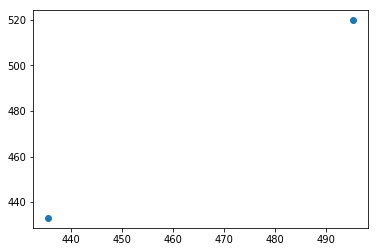

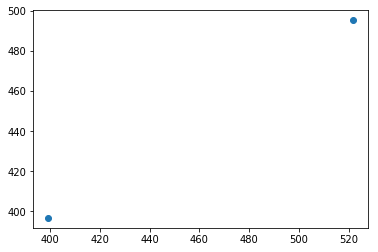

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015D966AF6A0>,
      dtype=object)

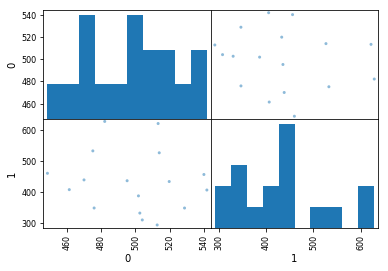

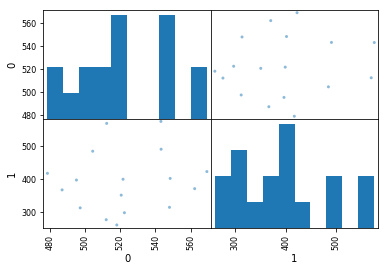

In [94]:
show_scatter(dat1)
show_scatter(dat2)
x1  =pd.DataFrame(dat1)
x2  =pd.DataFrame(dat2)
pd.plotting.scatter_matrix(x1)
pd.plotting.scatter_matrix(x2)

In [95]:
E,mask = cv2.findEssentialMat(dat1,dat2)

In [96]:
R1,R2,t = cv2.decomposeEssentialMat(E)

In [97]:
print(R1)
print("----------")
print(R2)
print("----------")
print(t)

[[ 9.96870369e-01  7.90534903e-02  1.11374287e-04]
 [-7.90534763e-02  9.96870369e-01 -1.24524473e-04]
 [-1.20869820e-04  1.15330233e-04  9.99999986e-01]]
----------
[[ 9.97099310e-01  7.61113261e-02  1.78612785e-04]
 [ 7.61113047e-02 -9.97099320e-01  1.24096587e-04]
 [ 1.87539842e-04 -1.10142169e-04 -9.99999976e-01]]
----------
[[ 9.99998911e-01]
 [-1.47553319e-03]
 [ 3.34357887e-05]]


In [ ]:
# 需要相机矩阵才能进行三维重构

In [50]:
data2 = data2.item()

In [43]:
data2.keys()

dict_keys(['keypoints_symmetry', 'num_joints'])

In [48]:
data2_keypoints = data2['keypoints_symmetry']

In [49]:
data2_keypoints

[[4, 5, 6, 11, 12, 13], [1, 2, 3, 14, 15, 16]]

In [45]:
data2_num_joints = data2['num_joints']

In [46]:
data2_num_joints

17